In [26]:
# 🚀 Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [27]:
# ✅ Step 2: Set Dataset Path (Fix: no /vehicle_dataset suffix)
data_dir = "/kaggle/input/vehicle-images-dataset"

In [28]:
# ✅ Step 3: Define Image Parameters
img_height, img_width = 128, 128
batch_size = 32

In [29]:
# ✅ Step 4: Create Image Data Generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 12519 images belonging to 7 classes.
Found 3126 images belonging to 7 classes.


In [30]:
# ✅ Step 5: Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752521012.935968      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752521012.936783      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [31]:
# ✅ Step 6: Train the Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1752521017.663959     111 service.cc:148] XLA service 0x7d4418005ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752521017.664816     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752521017.664861     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752521018.024383     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/392 ━━━━━━━━━━━━━━━━━━━━ 44:22 7s/step - accuracy: 0.1250 - loss: 1.9355

I0000 00:00:1752521021.693028     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


392/392 ━━━━━━━━━━━━━━━━━━━━ 127s 307ms/step - accuracy: 0.3049 - loss: 1.7584 - val_accuracy: 0.4527 - val_loss: 1.3504
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 81s 207ms/step - accuracy: 0.4342 - loss: 1.3673 - val_accuracy: 0.5090 - val_loss: 1.1692
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 82s 209ms/step - accuracy: 0.5085 - loss: 1.1862 - val_accuracy: 0.5713 - val_loss: 1.0456
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 81s 207ms/step - accuracy: 0.5555 - loss: 1.0872 - val_accuracy: 0.6081 - val_loss: 0.9577
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 81s 205ms/step - accuracy: 0.5777 - loss: 1.0090 - val_accuracy: 0.6312 - val_loss: 0.8731
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - accuracy: 0.6143 - loss: 0.9455 - val_accuracy: 0.6350 - val_loss: 0.8612
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 80s 203ms/step - accuracy: 0.6345 - loss: 0.8934 - val_accuracy: 0.6443 - val_loss: 0.8475
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.6381 - loss: 0.8710 - va

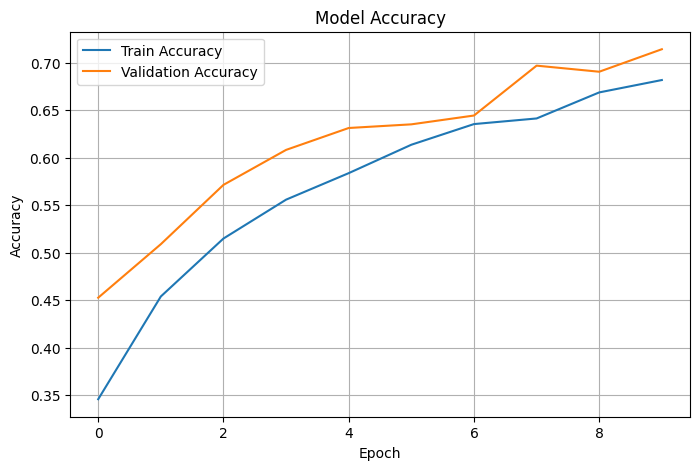

In [32]:
# ✅ Step 7: Plot Accuracy Graph
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# ✅ Step 8: Save the Model to Output
model.save("/kaggle/working/vehicle_type_classifier.h5")
print("✅ Model saved to /kaggle/working/vehicle_type_classifier.h5")

✅ Model saved to /kaggle/working/vehicle_type_classifier.h5
